In [1]:
### installer les libairies
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:/Users/lenovo/Desktop/data science/projet python/projet Data Analysis/datasets/Sales_Data')

In [3]:
files = os.listdir('C:/Users/lenovo/Desktop/data science/projet python/projet Data Analysis/datasets/Sales_Data')

In [7]:
df=pd.DataFrame()
for file in files:
    data=pd.read_csv(file)
    df=pd.concat([df,data])

In [8]:
#df.to_csv('analyse de vende.csv',index=False) #telecharger le ficher en csv

In [9]:
(df.isnull().sum()/df.shape[0])*100

Order ID            0.291678
Product             0.291678
Quantity Ordered    0.291678
Price Each          0.291678
Order Date          0.291678
Purchase Address    0.291678
dtype: float64

In [10]:
df.dropna(inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372610 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          372610 non-null  object
 1   Product           372610 non-null  object
 2   Quantity Ordered  372610 non-null  object
 3   Price Each        372610 non-null  object
 4   Order Date        372610 non-null  object
 5   Purchase Address  372610 non-null  object
dtypes: object(6)
memory usage: 19.9+ MB


In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### le mois durant lequel on a realiser plus de vent

In [13]:
def month(x):
    return x.split('/')[0]

In [23]:
df['month']=df['Order Date'].apply(month)

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [25]:
#df=df[df.month!= 'Order Date']

In [26]:
df['month']=df.month.astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          371900 non-null  object
 1   Product           371900 non-null  object
 2   Quantity Ordered  371900 non-null  object
 3   Price Each        371900 non-null  object
 4   Order Date        371900 non-null  object
 5   Purchase Address  371900 non-null  object
 6   month             371900 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 21.3+ MB


In [16]:
df['Price Each']=df['Price Each'].astype(float)
df['Quantity Ordered']=df['Quantity Ordered'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371900 entries, 0 to 11685
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          371900 non-null  object 
 1   Product           371900 non-null  object 
 2   Quantity Ordered  371900 non-null  int32  
 3   Price Each        371900 non-null  float64
 4   Order Date        371900 non-null  object 
 5   Purchase Address  371900 non-null  object 
 6   month             371900 non-null  int32  
dtypes: float64(1), int32(2), object(4)
memory usage: 19.9+ MB


In [18]:
df['sales']=df['Quantity Ordered']*df['Price Each']

<AxesSubplot:xlabel='months par num', ylabel='vendu par mois'>

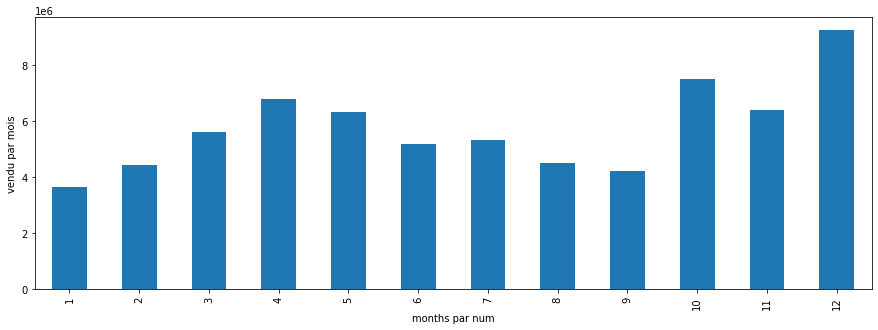

In [19]:
df.groupby('month')['sales'].sum().plot(kind='bar',
                                        ylabel='vendu par mois',xlabel='months par num'
                                       ,figsize = (15, 5))

### dans quelle ville nous avons enregistre un maximum de commade

In [20]:
df['Purchase Address'].unique()

array(['917 1st St, Dallas, TX 75001',
       '682 Chestnut St, Boston, MA 02215',
       '669 Spruce St, Los Angeles, CA 90001', ...,
       '981 4th St, New York City, NY 10001',
       '840 Highland St, Los Angeles, CA 90001',
       '220 12th St, San Francisco, CA 94016'], dtype=object)

In [21]:
def ville(x):
    return x.split(',')[1]

In [22]:
df['ville']=df['Purchase Address'].apply(ville)

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,ville
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


<AxesSubplot:xlabel='ville', ylabel='Quantity Ordered'>

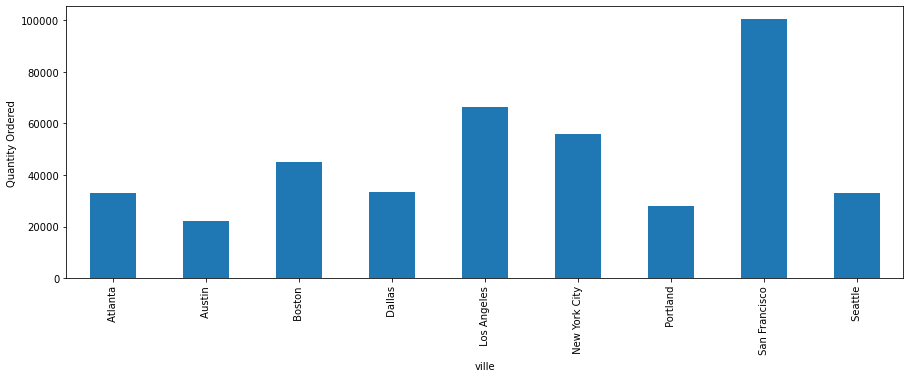

In [24]:
df.groupby('ville')['Quantity Ordered'].sum().plot(kind='bar',
                                                   ylabel='Quantity Ordered',
                                                   xlabel='ville',figsize = (15, 5))

### En quelle moment doit on faire une campagne publicitaire pour avoir plus de vend 

### Quel produit se vend de plus

In [25]:
df['Product'].value_counts()

USB-C Charging Cable          43806
Lightning Charging Cable      43316
AAA Batteries (4-pack)        41282
AA Batteries (4-pack)         41154
Wired Headphones              37764
Apple Airpods Headphones      31098
Bose SoundSport Headphones    26650
27in FHD Monitor              15014
iPhone                        13684
27in 4K Gaming Monitor        12460
34in Ultrawide Monitor        12362
Google Phone                  11050
Flatscreen TV                  9600
Macbook Pro Laptop             9448
ThinkPad Laptop                8256
20in Monitor                   8202
Vareebadd Phone                4130
LG Washing Machine             1332
LG Dryer                       1292
Name: Product, dtype: int64

In [26]:
#produit=df.groupby('Product')['Quantity Ordered'].sum().index
#quanlity=df.groupby('Product')['Quantity Ordered'].sum()
#prix=df.groupby('Product')['Price Each'].mean()

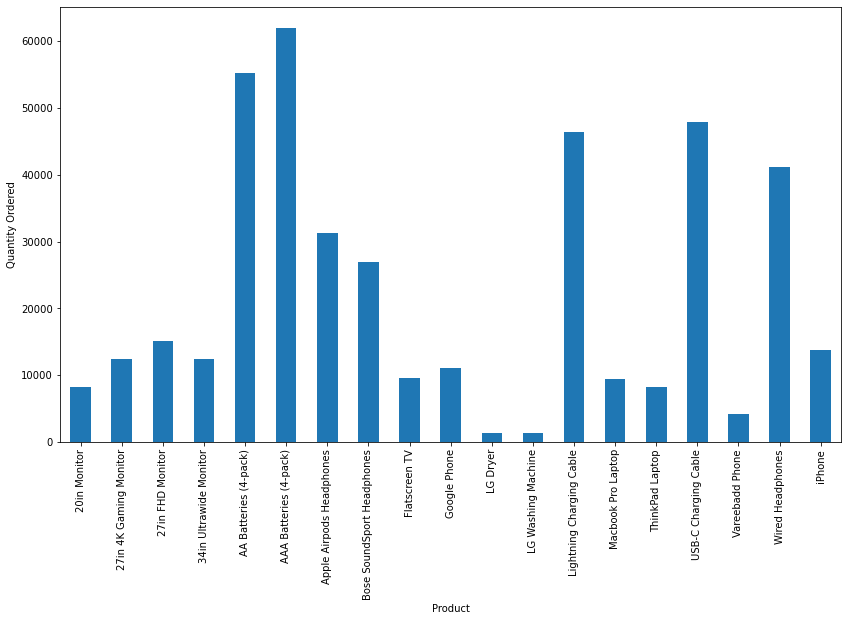

In [27]:
produit=df.groupby('Product')['Quantity Ordered'].sum().plot(
    kind='bar',xlabel='Product',ylabel='Quantity Ordered',
                                                            figsize=(14,8))


### quelles sont les combinaisons de produit qui se vendend de plus

In [52]:
df1=df[df['Order ID'].duplicated(keep=False)]

In [ ]:
df1['group']=df1.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<AxesSubplot:ylabel='group'>

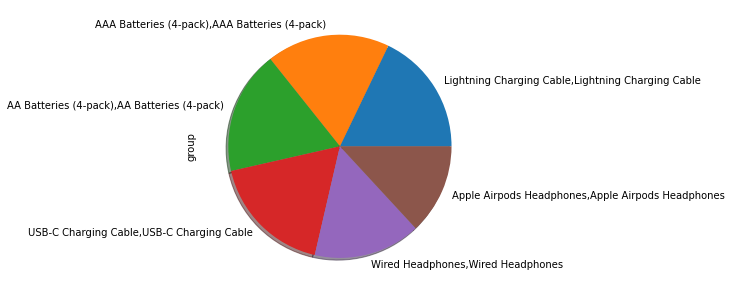

In [106]:
df1['group'].value_counts()[0:6].plot(kind='pie',figsize = (5, 15),shadow=True 
                                      ,radius=1)